In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:

import numpy as np
from vmc import VMCvec, VMC
from trial_wavefunctions import helium_1_param_vec, helium_1_param


psi = helium_1_param_vec

'''Initial parameters'''
alpha = np.ones(1000) * 0.38
alpha_iterations = 50
N_metropolis = 10000
random_walkers = 1
gamma = 0.5

energy_plot = np.array([])
alpha_plot = np.array([])
variance_plot = np.array([])

for i in range(alpha_iterations):
    
    sim = VMCvec(alpha, psi)
    E = 0
    E2 = 0
    dE_dalpha = 0
    Eln = 0
    ln = 0
    rejection_ratio = 0
    alpha_step = 0.01

    E_met, E2_met, Eln_met, ln_met, rejections_met = sim.metropolis(N_metropolis)
    E = np.sum(E_met) / len(E_met)
    E2 = np.sum(E2_met) / len(E2_met)
    Eln = np.sum(Eln_met) / len(Eln_met)
    ln = np.sum(ln_met) / len(ln_met)
    rejection_ratio = np.sum(rejections_met) / len(rejections_met) 

    '''Define next alpha'''
    dE_dalpha = 2 * (Eln - E * ln)
    print('Alpha: ', alpha[0], '<E>: ', E, 'VarE: ', E2 - E **2, 'ratio = ', rejection_ratio)
    #alpha = al pha + alpha_step
    alpha = alpha - gamma * dE_dalpha

    '''Plot'''    
    energy_plot = np.append(energy_plot, E)
    alpha_plot = np.append(alpha_plot, alpha)
    variance_plot = np.append(variance_plot, E2-E**2)

Alpha:  0.38 <E>:  -2.865945506222205 VarE:  0.08575011348536066 ratio =  0.6002450999999503
Alpha:  0.3427907945456533 <E>:  -2.868526402096966 VarE:  0.08456241769367878 ratio =  0.60172449999995
Alpha:  0.3063388397963055 <E>:  -2.870623450903122 VarE:  0.08453309527865649 ratio =  0.6034159999999499
Alpha:  0.2719308569664315 <E>:  -2.8727957601208827 VarE:  0.08634834291463278 ratio =  0.6052308999999496
Alpha:  0.2400816238236948 <E>:  -2.8755780136933016 VarE:  0.08960863439761901 ratio =  0.6070963999999495
Alpha:  0.2124739154731018 <E>:  -2.876746022770386 VarE:  0.09426097902156805 ratio =  0.6089831999999492
Alpha:  0.1894944550877241 <E>:  -2.877853675491392 VarE:  0.09936913978210526 ratio =  0.6106119999999491
Alpha:  0.17233137511481667 <E>:  -2.878117323329092 VarE:  0.10425507702495906 ratio =  0.611795699999949
Alpha:  0.1602926268946897 <E>:  -2.8781868140184805 VarE:  0.10795023015165839 ratio =  0.6128758999999488
Alpha:  0.1530929356768157 <E>:  -2.87887603269972

In [ ]:
# Standard loop
psi = helium_1_param
    
'''Initial parameters'''
alpha = 0.38
alpha_iterations = 50
N_metropolis = 10000
random_walkers = 5
gamma = 0.5

energy_plot = np.array([])
alpha_plot = np.array([])
variance_plot = np.array([])

for i in range(alpha_iterations):
    
    sim = VMC(alpha, psi)
    E = 0
    E2 = 0
    dE_dalpha = 0
    Eln = 0
    ln = 0
    rejection_ratio = 0
    alpha_step = 0.01

    for j in range(random_walkers): #We use more than one random_walkers in case one gets stuck at some X
        E_met, E2_met, Eln_met, ln_met, rejections_met = sim.metropolis(N_metropolis)
        E += E_met/random_walkers
        E2 += E2_met/random_walkers
        Eln += Eln_met/random_walkers
        ln += ln_met/random_walkers
        rejection_ratio += rejections_met/random_walkers 

    '''Define next alpha'''
    dE_dalpha = 2 * (Eln - E * ln)
    print('Alpha: ', alpha, '<E>: ', E, 'VarE: ', E2 - E **2, 'ratio = ', rejection_ratio)
    #alpha = alpha + alpha_step
    alpha = alpha - gamma * dE_dalpha

    '''Plot'''    
    energy_plot = np.append(energy_plot, E)
    alpha_plot = np.append(alpha_plot, alpha)
    variance_plot = np.append(variance_plot, E2-E**2)


Alpha:  0.38 <E>:  -2.8516674667369415 VarE:  0.08715746205829866 ratio =  0.4012599999999721
Alpha:  0.34236052605503187 <E>:  -2.874008312440419 VarE:  0.07953550924910147 ratio =  0.3974199999999726
Alpha:  0.31178042132123285 <E>:  -2.8684673348679937 VarE:  0.08349745811906928 ratio =  0.39493999999997276
Alpha:  0.27631422079193635 <E>:  -2.8795343816819923 VarE:  0.08529991793522207 ratio =  0.3925999999999731
Alpha:  0.24074669549751804 <E>:  -2.872258314261832 VarE:  0.09335360594191577 ratio =  0.393679999999973
Alpha:  0.21400344058634546 <E>:  -2.8859099203237775 VarE:  0.09211220618656668 ratio =  0.39453999999997286
Alpha:  0.19208536901736684 <E>:  -2.8851133343131936 VarE:  0.09938047485525736 ratio =  0.3906599999999733
Alpha:  0.17048980938972413 <E>:  -2.8821942304697727 VarE:  0.10078786436434584 ratio =  0.3910799999999732
Alpha:  0.160065615453998 <E>:  -2.873679653463587 VarE:  0.10268804363070849 ratio =  0.38593999999997386
Alpha:  0.153630495763856 <E>:  -2.87

KeyboardInterrupt: 

### Analytical expressions using sympy

In [4]:
from sympy import *
import math

In [ ]:
x1, y1, z1 = symbols('x_1 y_1 z_1')
x2, y2, z2 = symbols('x_2 y_2 z_2')
init_printing(use_unicode=True)

In [21]:
alpha1, alpha2, alpha3, alpha4 = symbols('alpha_1 alpha_2 alpha_3 alpha_4')

In [22]:
alpha1

In [6]:
r1 = (x1, y1, z1)
r2 = (x2, y2, z2)

In [7]:
r1_ = sqrt(x1 ** 2 + y1 **2 + z1 **2)
r2_ = sqrt(x2 ** 2 + y2 **2 + z2 **2)

In [17]:
r12 = sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2 + (z2 - z1) ** 2)

In [26]:
G = exp(-2 * (r1_ + r2_))
M = 1 + 1/2 * r12 * exp(-alpha1*r12)
H = 1 + alpha2 * (r1_ + r2_)*(r12) + alpha3 * (r1_ - r2_) ** 2 - alpha4 * r12

In [28]:
def laplacian_1(exp):
    return simplify(diff(diff(exp, x1), x1) + diff(diff(exp, y1), y1) + diff(diff(exp, z1), z1))

def laplacian_2(exp):
    return simplify(diff(diff(exp, x1), x1) + diff(diff(exp, y1), y1) + diff(diff(exp, z1), z1))

In [31]:
lap_G_1 = laplacian_1(G)
lap_M_1 = laplacian_1(M)
lap_H_1 = laplacian_1(H)

In [33]:
simp_lap_1 = simplify(lap_G_1 + lap_M_1 + lap_H_1)

KeyboardInterrupt: 

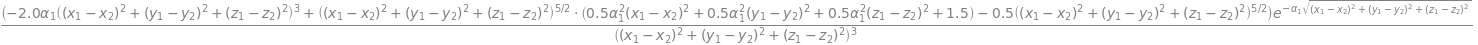

In [32]:
lap_M_1

In [30]:
simplify(laplacian_1(G) + laplacian_1(M) + laplacian_1(H))

KeyboardInterrupt: 

In [ ]:
simplify(laplacian_2(G) + laplacian_2(M) + laplacian_2(H))